Import packages for plotting, numerics and for importing 

In [1]:
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerics
import pandas as pd  # For importing conveniently

Read the datasets from the csv files

In [2]:
# Dataset 1
y = pd.read_csv("Question2_Set1.csv",header = None) # imports as a pandas dataframe
data1 = y.values.tolist()  # extracts the values as a list
# Dataset 2
y = pd.read_csv("Question2_Set2.csv",header = None)
data2 = y.values.tolist()
# Dataset 3
y = pd.read_csv("Question2_Set3.csv",header = None)
data3 = y.values.tolist()


## Problem 2a)

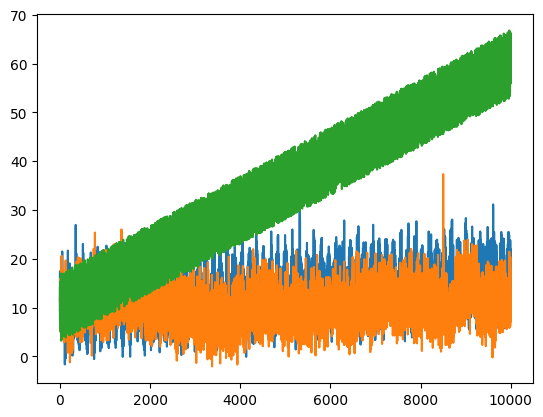

In [3]:
fig, ax = plt.subplots(1) # Creates figure fig and add an axes, ax.
x=np.linspace(1,len(data1),len(data1))
ax.plot(x,data1)
ax.plot(x,data2)
ax.plot(x,data3)


## Problem 2b)

In [4]:
# Data to array
arr1 = [element[0] for element in data1]
arr2 = [element[0] for element in data2]
arr3 = [element[0] for element in data3]

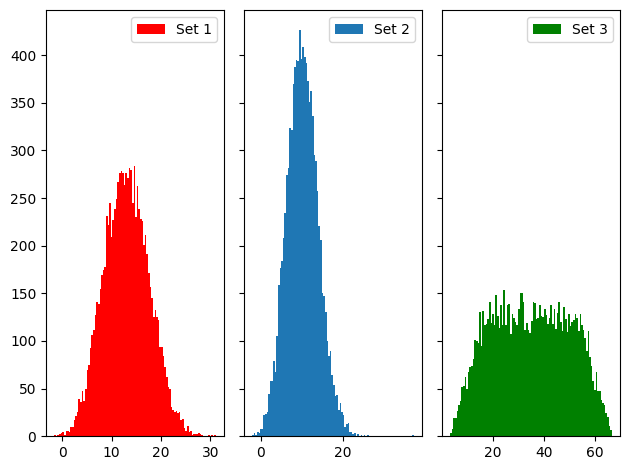

In [5]:
#Plotting Histograms 
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
n_bins = 100

# axs[0].set_xlabel('x-Axis')
# axs[0].set_ylabel('y-Axis')

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(arr1, bins=n_bins,color="r", label='Set 1')
axs[1].hist(arr2, bins=n_bins, label='Set 2')
axs[2].hist(arr3, bins=n_bins, color="g",label='Set 3')

axs[0].legend()
axs[1].legend()
axs[2].legend()


## Problem 2c)

In [20]:
tau = 4

y_arr = [round(np.mean(arr1[i:i + tau]),3)for i in range(0, len(arr1), tau)]     

def allandeviation(input_data,tau):
    # calculate the Allan deviation for a given tau, i.e it returns a single value
    # list comprehension
    y_arr = [round(np.mean(input_data[i:i + tau]),3) for i in range(0, len(input_data), tau)]     
    y_sum = np.sum([(y_arr[i+1]-y_arr[i])**2 for i in range(0,len(y_arr)-1)])
    k = len(y_arr)
    sigma_2 = 1/(2*(k-1)) * y_sum
    
    return sigma_2

# print(allandeviation(arr1,5))
# a_dev_tau = [allandeviation(arr1, int(i)) for i in range(1, 4)]
# print(a_dev_tau)


def allandeviation2(input_data, tau_max):
    a_dev_tau = [allandeviation(input_data, i) for i in range(1,int(tau_max))]
    x =  [x for x in range(0,int(tau_max)-1)]
    return x, a_dev_tau

tau_max = 1000
x, a_dev_tau_1 = allandeviation2(arr1, tau_max=tau_max)
x, a_dev_tau_2 = allandeviation2(arr2, tau_max=tau_max)
x, a_dev_tau_3 = allandeviation2(arr3, tau_max=tau_max)

Text(0.5, 0.98, 'Allan Variance')

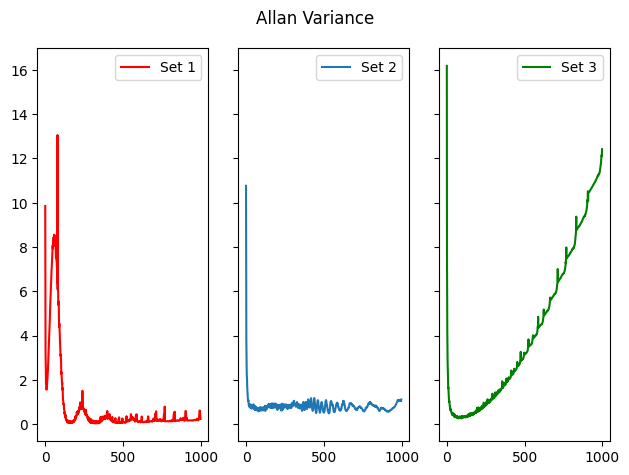

In [21]:
#Plotting allan deviation  
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# axs[0].set_xlabel('x-Axis')
# axs[0].set_ylabel('y-Axis')

# We can set the number of bins with the *bins* keyword argument.
axs[0].plot(x,a_dev_tau_1, color="r", label='Set 1')
axs[1].plot(x, a_dev_tau_2,  label='Set 2')
axs[2].plot(x, a_dev_tau_3,  color="g",label='Set 3')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.suptitle("Allan Variance")

## Problem 2d)

Text(0.5, 0.98, 'Allan Variance (log log)')

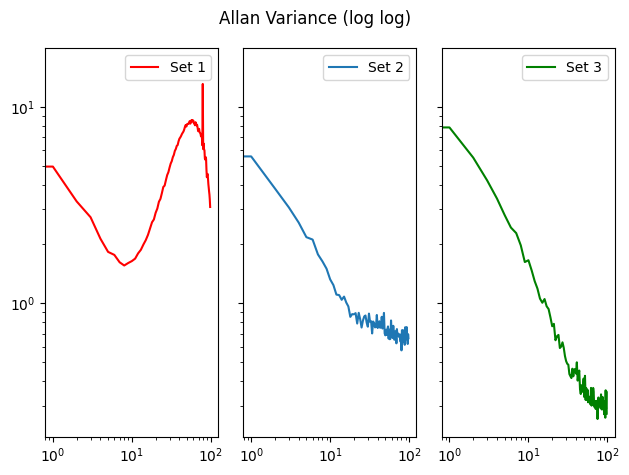

In [127]:
#Plotting allan deviation  
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# axs[0].set_xlabel('x-Axis')
# axs[0].set_ylabel('y-Axis')

# We can set the number of bins with the *bins* keyword argument.
axs[0].loglog(x,a_dev_tau_1, color="r", label='Set 1')
axs[1].loglog(x, a_dev_tau_2,  label='Set 2')
axs[2].loglog(x, a_dev_tau_3,  color="g",label='Set 3')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.suptitle("Allan Variance (log log)")
